In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
genome_scores = pd.read_csv('data/genome-scores.csv')
genome_tags = pd.read_csv('data/genome-tags.csv')

count    1.558445e+07
mean     1.163679e-01
std      1.544722e-01
min      2.500000e-04
25%      2.400000e-02
50%      5.650000e-02
75%      1.407500e-01
max      1.000000e+00
Name: relevance, dtype: float64

<AxesSubplot: xlabel='relevance', ylabel='Density'>

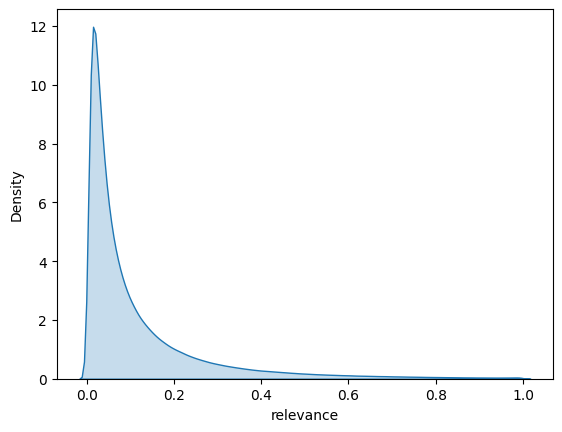

In [3]:
display(genome_scores.describe()['relevance'])
sns.kdeplot(genome_scores['relevance'], fill=True)

In [4]:

mean_relevance = genome_scores.groupby('tagId').mean()['relevance']

# Filter out tags with low mean relevance
threshold = 0.2
good_tags = mean_relevance.where(mean_relevance > threshold).dropna().index
genome_scores_2 = genome_scores[genome_scores['tagId'].isin(good_tags)]

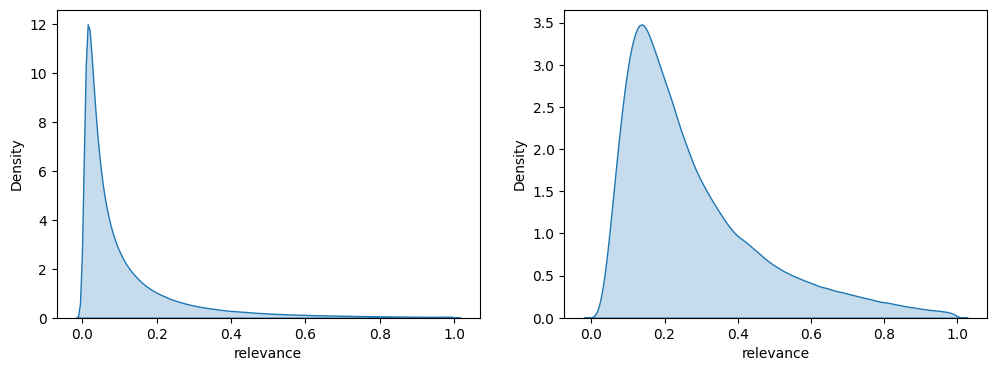

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sns.kdeplot(genome_scores_2['relevance'], ax=ax2, fill=True)
sns.kdeplot(genome_scores['relevance'], ax=ax1, fill=True)

plt.show()

In [6]:
# Merge movies with genome scores
movies = pd.read_csv('data/movies.csv')
genome_scores_2['tag'] = genome_scores_2['tagId'].map(genome_tags.set_index('tagId')['tag'].to_dict())
genome_table = genome_scores_2.pivot_table(index='movieId', columns='tag', values='relevance').head()

movies_genome = pd.merge(movies, genome_table, on='movieId', how='left')
movies_genome.head()


/tmp/ipykernel_10712/2209110849.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genome_scores_2['tag'] = genome_scores_2['tagId'].map(genome_tags.set_index('tagId')['tag'].to_dict())


,movieId,title,genres,absurd,action,adaptation,adapted from:book,adventure,affectionate,allegory,...,visceral,visual,visually appealing,visually stunning,weapons,weird,whimsical,witty,women,writers
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0.10400,0.66250,0.31675,0.28600,0.89375,0.67625,0.24600,...,0.15150,0.56375,0.3150,0.67325,0.26375,0.42700,0.58700,0.69400,0.08925,0.14125
1,2,Jumanji (1995),Adventure|Children|Fantasy,0.15925,0.64025,0.51450,0.48450,0.97600,0.12675,0.17750,...,0.07325,0.38150,0.2250,0.21700,0.17800,0.38650,0.29250,0.18725,0.13525,0.12225
2,3,Grumpier Old Men (1995),Comedy|Romance,0.11375,0.16025,0.25200,0.19375,0.32150,0.09550,0.10775,...,0.10175,0.10725,0.1960,0.09850,0.14125,0.24350,0.13025,0.22325,0.35075,0.12200
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0.13375,0.14700,0.50700,0.46175,0.14875,0.13150,0.07750,...,0.08800,0.10750,0.2115,0.11625,0.28950,0.21975,0.14775,0.10725,0.97525,0.18200
4,5,Father of the Bride Part II (1995),Comedy,0.15475,0.15575,0.28925,0.19800,0.16350,0.11875,0.06975,...,0.08275,0.11925,0.1850,0.11875,0.12025,0.29350,0.16425,0.10475,0.40225,0.19225


In [7]:
# Find genres that are not in genome tags
genres = movies_genome['genres'].str.split('|')

genres = set([genre for genres in genres for genre in genres])
lower_case_tags = [str.lower(t) for t in genome_tags['tag'].values]
[g for g in genres if g.lower() not in lower_case_tags]

['(no genres listed)', 'IMAX', 'Film-Noir']